In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from shapely.geometry import Point
from shapely.ops import unary_union
from matplotlib.patches import Polygon

In [8]:
language = 'en'
source = 'Insee'
champ = 'France'
print('A - Context')

A - Context


In [3]:
# Main figures immigration France
population = 68.1434 # full 5613.9                
immigrants = 7.2818  # french def: born foreign abroad
immigrants_fr = 2.5 # 
immigrants_for = 4.8 # 
foreign = 5.6 # foreigners 
inter_i_f = 4.8 # intersection immigrants and foreigners
born_fr_abroad = 1.7 # born french abroad

if language == 'fr':
    label_for = 'Etrangers'
    label_immig = 'Immigrés'
    label_for_immig = 'Immigré étrangers'
    label_born_fr_ab = 'Né français à l\'étranger'
    label_demo = 'Démographie'
    label_lec = 'Lecture'
    label_champ = 'Champ'
elif language == 'en':
    label_for = 'Foreigners'
    label_immig = 'Immigrants'
    label_for_immig = 'Foreign immigrants'
    label_born_fr_ab = 'Born french abroad'
    label_demo = 'Demography'
    label_lec = 'Reading'
    label_champ = 'Scope'
    

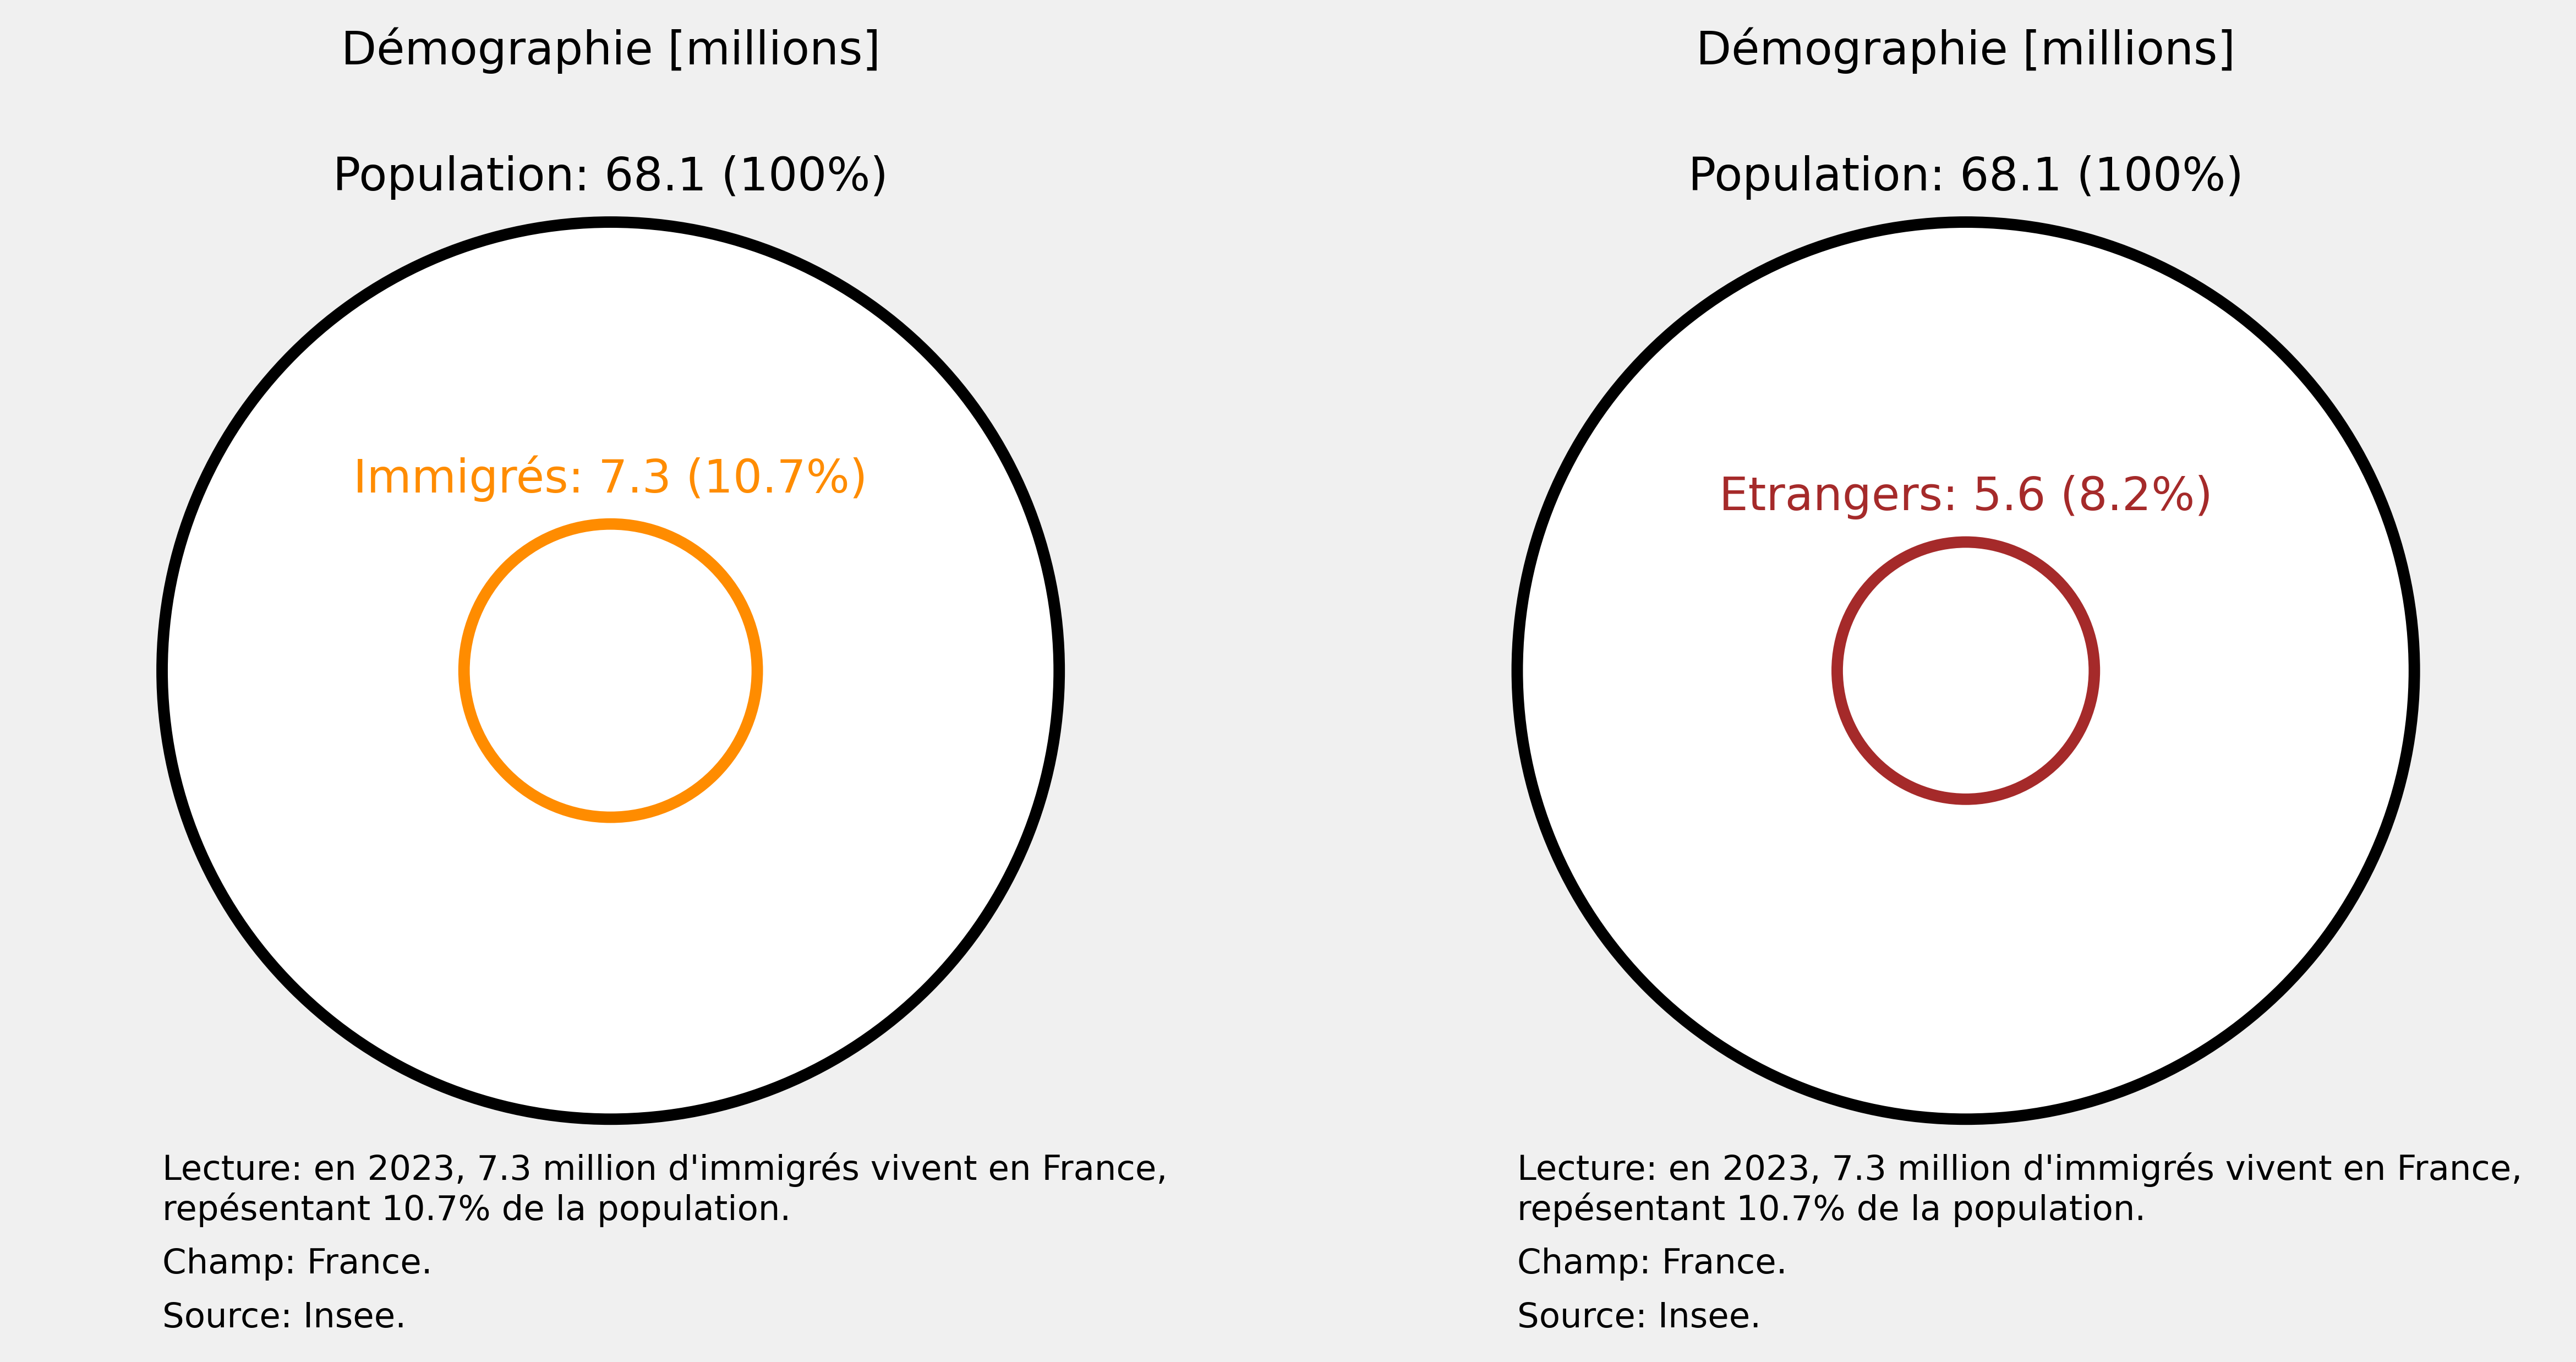

In [4]:
# read the graph
lecture_fr = f"en 2023, 7.3 million d'immigrés vivent en France,\nrepésentant 10.7% de la population"
lecture_en = f"in 2023, 7.3 million immigrants live in France,\nrepresenting 10.7% of the population"

if language == 'fr':
    lecture = lecture_fr 
elif language == 'en':
    lecture = lecture_en

# Compute the ratio of areas
ratio_i = immigrants / population
ratio_f = foreign / population

# Compute radius of larger circle so area ratio matches
r = 1
r_i = np.sqrt(ratio_i) * r
r_f = np.sqrt(ratio_f) * r

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=500)  # One row, two columns
fig.patch.set_facecolor('#f0f0f0')  # overall background (optional)

# Common settings
circle_width = 3
fontsize = 12

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.axis('off')
    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)

# Draw circles on ax1
ax1.add_artist(plt.Circle((0, 0), r, fill=True, facecolor='white', edgecolor='black', linewidth=circle_width))
ax1.add_artist(plt.Circle((0, 0), r_i, fill=True, facecolor='white', edgecolor='darkorange', linewidth=circle_width))
ax1.text(0, r + 0.05, f'Population: {population:.3g} ({population/population*100:.3g}%)',
         ha='center', va='bottom', fontsize=fontsize)
ax1.text(0, r_i + 0.05, label_immig+f': {immigrants:.2g} ({ratio_i*100:.3g}%)',
         ha='center', va='bottom', fontsize=fontsize, color= 'darkorange')
ax1.set_title(label_demo+f" [millions]")

ax1.text(-r, -r - 0.24, label_lec+f': '+lecture+f".",
         ha='left', va='bottom', fontsize=fontsize-3)
ax1.text(-r, -r - 0.36, label_champ+f': '+champ+f".",
         ha='left', va='bottom', fontsize=fontsize-3)
ax1.text(-r, -r - 0.48, f'Source: '+source+".",
         ha='left', va='bottom', fontsize=fontsize-3)

# Draw circles on ax2
ax2.add_artist(plt.Circle((0, 0), r, fill=True, facecolor='white', edgecolor='black', linewidth=circle_width))
ax2.add_artist(plt.Circle((0, 0), r_f, fill=True, facecolor='white', edgecolor='brown', linewidth=circle_width))
ax2.text(0, r + 0.05, f'Population: {population:.3g} ({population/population*100:.3g}%)',
         ha='center', va='bottom', fontsize=fontsize)
ax2.text(0, r_f + 0.05, label_for+f': {foreign:.2g} ({ratio_f*100:.2g}%)',
         ha='center', va='bottom', fontsize=fontsize, color= 'brown')
ax2.set_title(label_demo+f" [millions]")

ax2.text(-r, -r - 0.24, label_lec+f': '+lecture+f".",
         ha='left', va='bottom', fontsize=fontsize-3)
ax2.text(-r, -r - 0.36, label_champ+f': '+champ+f".",
         ha='left', va='bottom', fontsize=fontsize-3)
ax2.text(-r, -r - 0.48, f'Source: '+source+".",
         ha='left', va='bottom', fontsize=fontsize-3)


plt.tight_layout()
#plt.show()
plt.savefig(f"plots/circles_each_"+language+f".png", dpi=500, bbox_inches='tight')

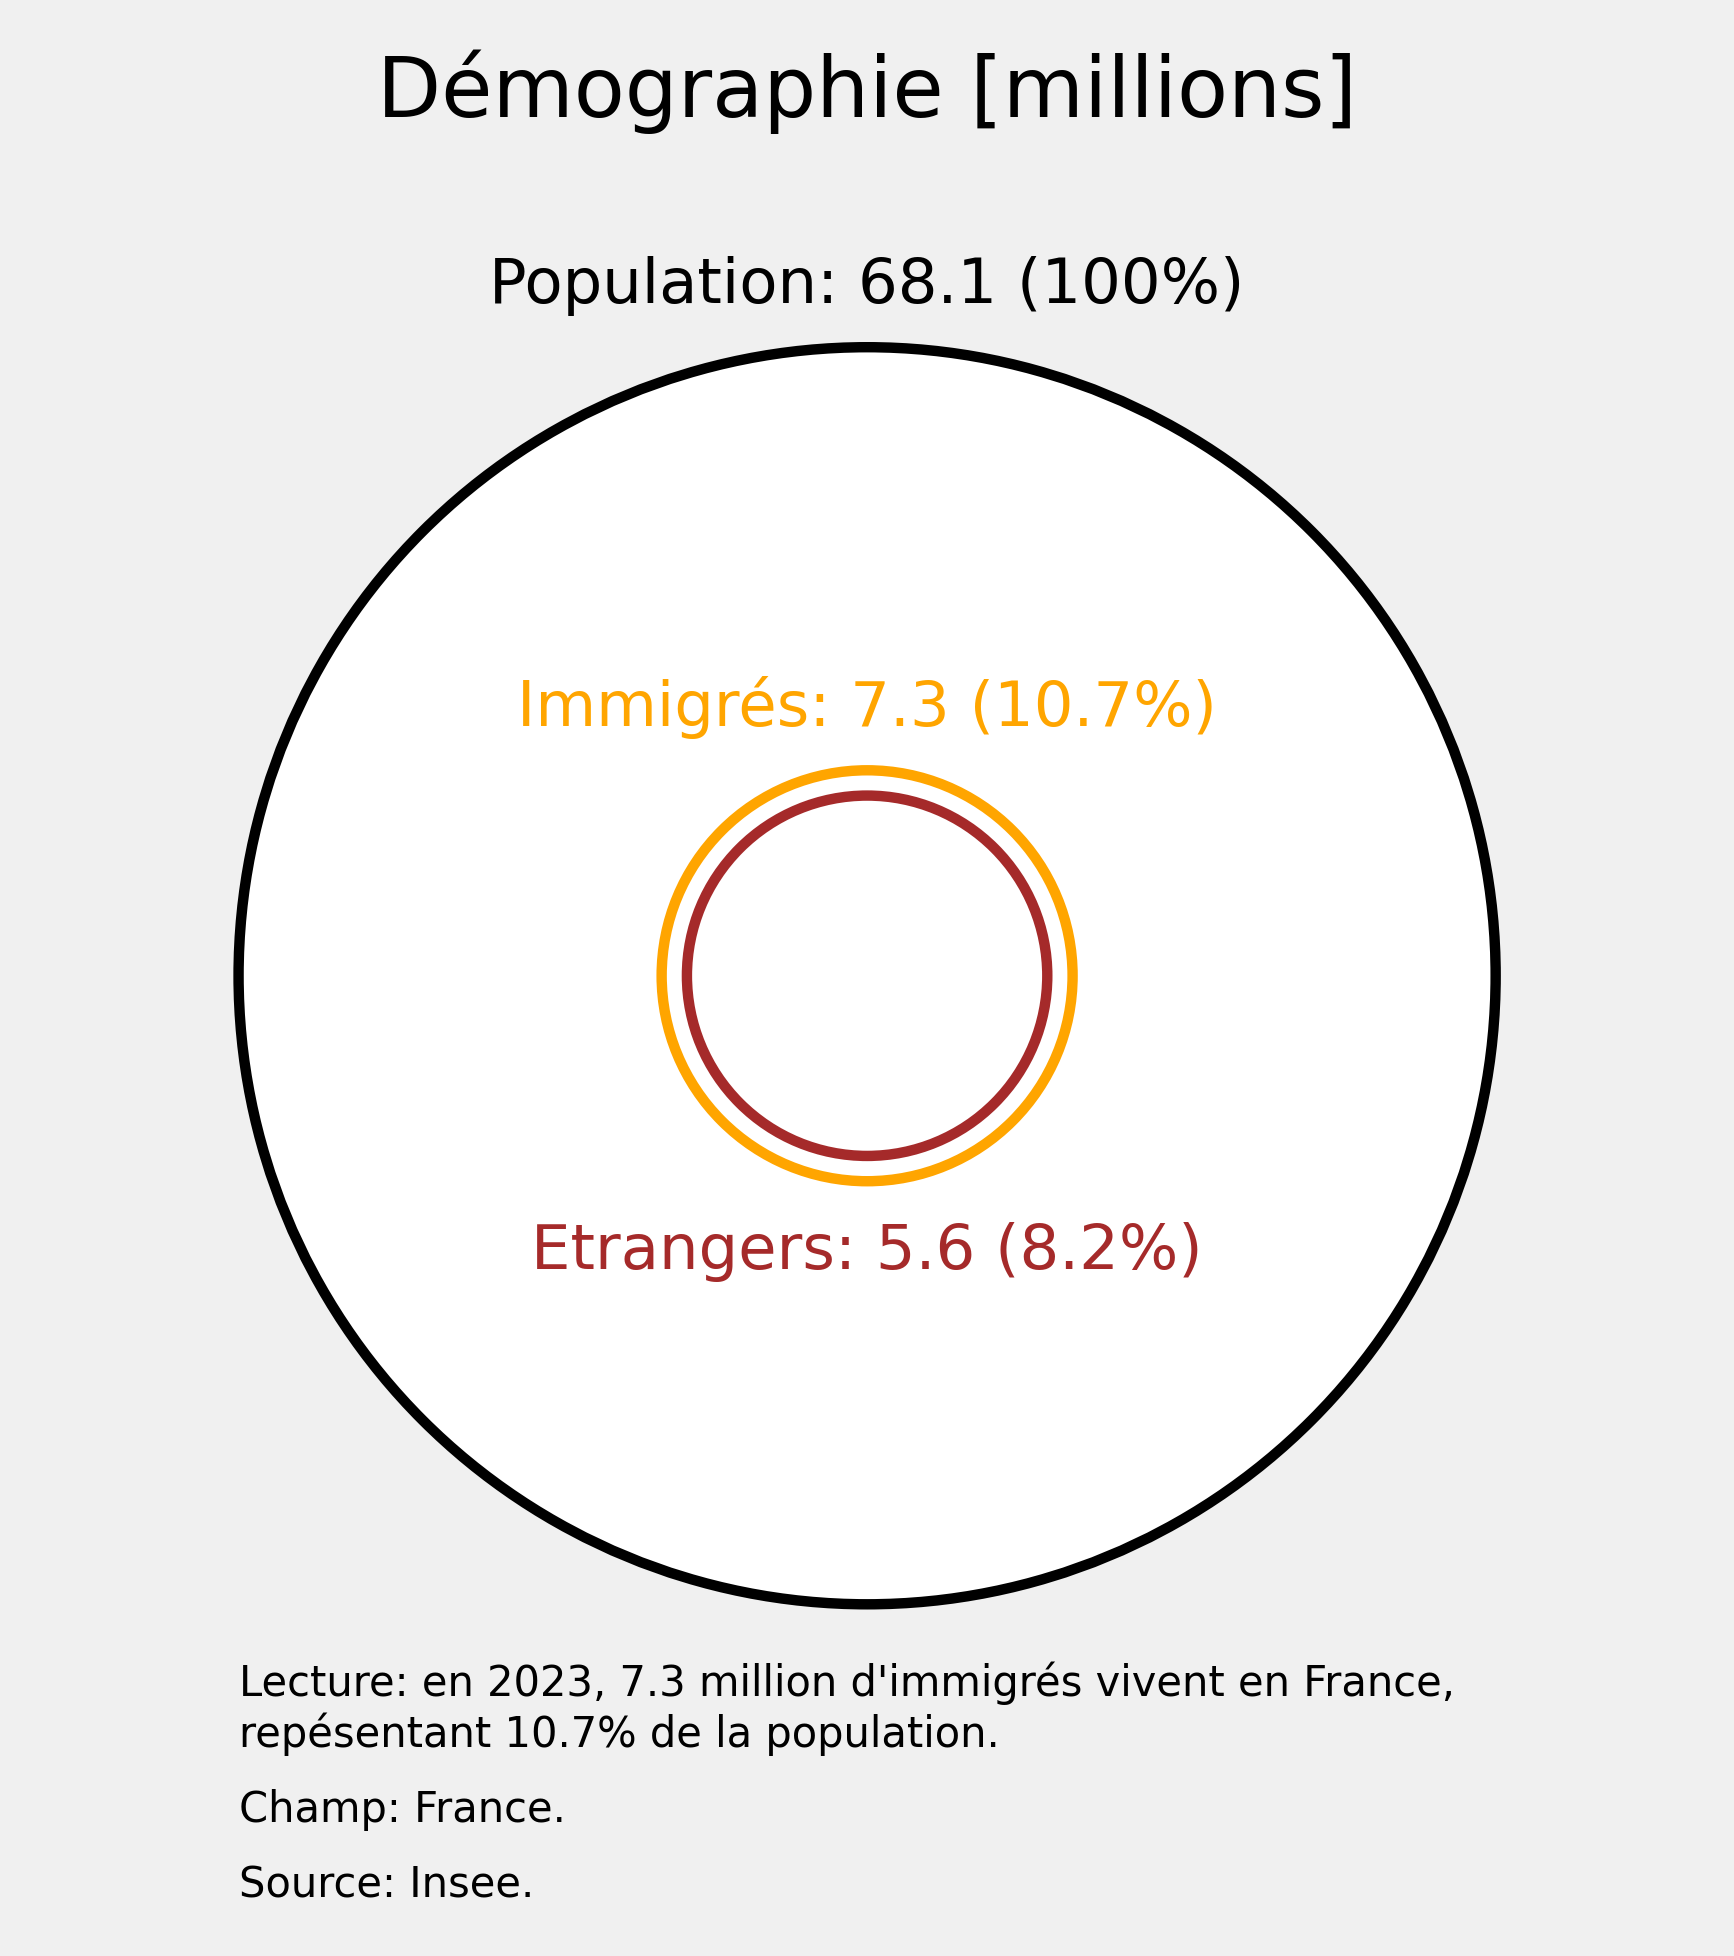

In [5]:
# read the graph
lecture_fr = f"en 2023, 7.3 million d'immigrés vivent en France,\nrepésentant 10.7% de la population"
lecture_en = f"in 2023, 7.3 million immigrants live in France,\nrepresenting 10.7% of the population"

if language == 'fr':
    lecture = lecture_fr 
elif language == 'en':
    lecture = lecture_en

# Compute the ratio of areas
ratio_i = immigrants / population
ratio_f = foreign / population
# Compute radius of larger circle so area ratio matches
r = 1
r_i = np.sqrt(ratio_i) * r
r_f = np.sqrt(ratio_f) * r

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=500)  # One row, two columns
fig.patch.set_facecolor('#f0f0f0')  # overall background (optional)

# Common settings
circle_width = 1.5
fontsize = 9

ax.set_aspect('equal')
ax.set_facecolor('white')
ax.axis('off')
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)

# Draw circles on ax1
ax.add_artist(plt.Circle((0, 0), r, fill=True, facecolor='white', edgecolor='black', linewidth=circle_width))
ax.add_artist(plt.Circle((0, 0), r_i, fill=False, edgecolor='orange', linewidth=circle_width))
ax.add_artist(plt.Circle((0, 0), r_f, fill=False, edgecolor='brown', linewidth=circle_width))

ax.text(0, r + 0.05, f'Population: {population:.3g} ({population/population*100:.3g}%)',
         ha='center', va='bottom', fontsize=fontsize)
ax.text(0, r_i + 0.05, label_immig+f': {immigrants:.2g} ({ratio_i*100:.3g}%)',
         ha='center', va='bottom', fontsize=fontsize, color = 'orange')
ax.text(0, -r_f - 0.2, label_for+f': {foreign:.2g} ({ratio_f*100:.2g}%)',
         ha='center', va='bottom', fontsize=fontsize, color = 'brown')

ax.set_title(label_demo+f" [millions]")

ax.text(-r, -r - 0.24, label_lec+f': '+lecture+f".",
         ha='left', va='bottom', fontsize=fontsize-3)
ax.text(-r, -r - 0.36, label_champ+f': '+champ+f".",
         ha='left', va='bottom', fontsize=fontsize-3)
ax.text(-r, -r - 0.48, f'Source: '+source+".",
         ha='left', va='bottom', fontsize=fontsize-3)

plt.tight_layout()
#plt.show()
#plt.savefig("plots/circles_both.png", dpi=500, bbox_inches='tight')
plt.savefig(f"plots/circles_both_"+language+f".png", dpi=500, bbox_inches='tight')

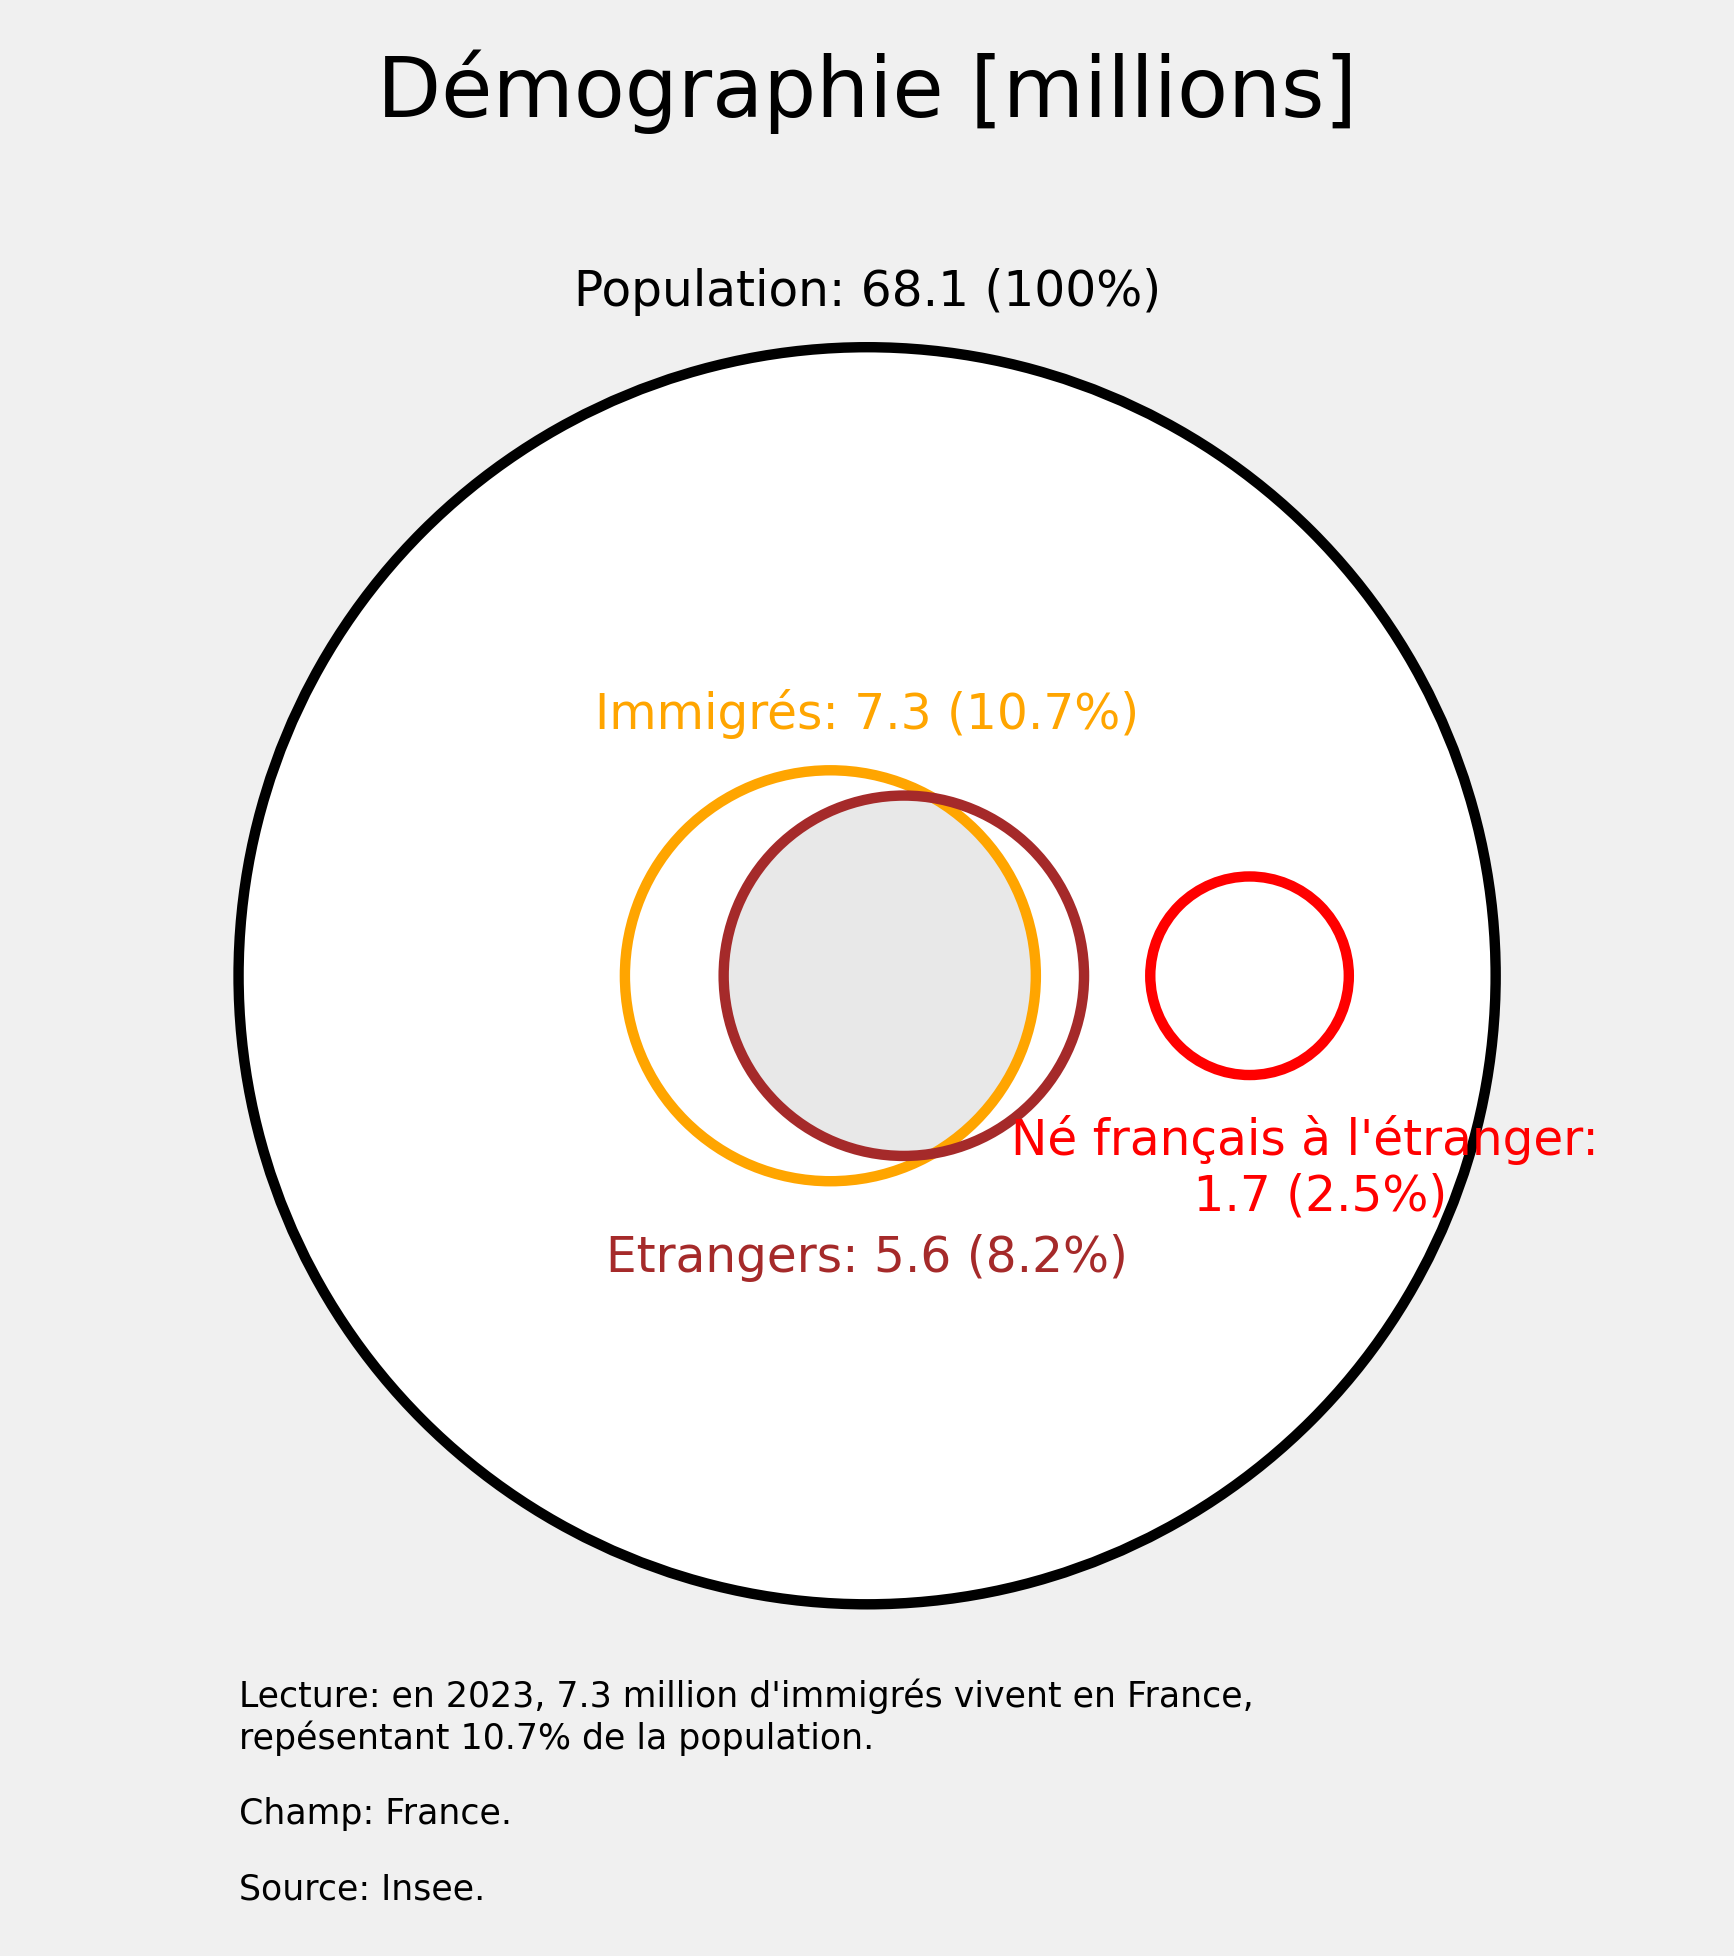

In [6]:
# read the graph
lecture_fr = f"en 2023, 7.3 million d'immigrés vivent en France,\nrepésentant 10.7% de la population"
lecture_en = f"in 2023, 7.3 million immigrants live in France,\nrepresenting 10.7% of the population"

if language == 'fr':
    lecture = lecture_fr 
elif language == 'en':
    lecture = lecture_en

# Compute the ratio of areas
ratio_i = immigrants / population
ratio_f = foreign / population
ratio_x = born_fr_abroad / population
S_inter = inter_i_f / population * np.pi * r**2

# Compute radius of larger circle so area ratio matches
r = 1
r_i = np.sqrt(ratio_i) * r
r_f = np.sqrt(ratio_f) * r
r_x = np.sqrt(ratio_x) * r

# Compute distance between circles for intersection area = inter_i_f
def inter_area(d, r1, r2):
    if d >= r1 + r2:
        return 0
    if d <= abs(r1 - r2):
        return np.pi * min(r1, r2)**2
    part1 = r1**2 * np.arccos((d**2 + r1**2 - r2**2) / (2 * d * r1))
    part2 = r2**2 * np.arccos((d**2 + r2**2 - r1**2) / (2 * d * r2))
    part3 = 0.5 * np.sqrt(
        (-d + r1 + r2) * (d + r1 - r2) *
        (d - r1 + r2) * (d + r1 + r2)
    )
    return part1 + part2 - part3

def objective(d):
    return abs(inter_area(d, r_i, r_f) - S_inter)

result = minimize_scalar(objective, bounds=(0, r_i + r_f), method='bounded')
d_optimal = result.x

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=500)  # One row, two columns
fig.patch.set_facecolor('#f0f0f0')  # overall background (optional)

# Common settings
circle_width = 1.5
leg_size = 7
note_size = 5

ax.set_aspect('equal')
ax.set_facecolor('white')
ax.axis('off')
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)

# Create shapely circles
circle_i_shape = Point(-d_optimal/2, 0).buffer(r_i, resolution=500)
circle_f_shape = Point(+d_optimal/2, 0).buffer(r_f, resolution=500)
intersection = circle_i_shape.intersection(circle_f_shape)

# Draw circles on ax1
ax.add_artist(plt.Circle((0, 0), r, fill=True, facecolor='white', edgecolor='black', linewidth=circle_width, zorder=1))

if not intersection.is_empty:
    # Get coordinates of the intersecting region
    x, y = intersection.exterior.xy
    ax.fill(x, y, color='lightgray', alpha=0.5, zorder=2)

ax.add_artist(plt.Circle((-d_optimal/2, 0), r_i, fill=False, edgecolor='orange', linewidth=circle_width, zorder=3))
ax.add_artist(plt.Circle((+d_optimal/2, 0), r_f, fill=False, edgecolor='brown', linewidth=circle_width, zorder=3))
ax.add_artist(plt.Circle((+d_optimal/2 + 0.55, 0), r_x, fill=False, edgecolor='red', linewidth=circle_width, zorder=3))
    
ax.text(0, r + 0.05, f'Population: {population:.3g} ({population/population*100:.3g}%)',
         ha='center', va='bottom', fontsize=leg_size)
ax.text(0, r_i + 0.05, label_immig+f': {immigrants:.2g} ({ratio_i*100:.3g}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'orange')
ax.text(0, -r_f - 0.2, label_for+f': {foreign:.2g} ({ratio_f*100:.2g}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'brown')
ax.text(d_optimal/2 + 0.65, -r_x - 0.23, label_born_fr_ab+f': \n {born_fr_abroad} ({ratio_x*100:.2g}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'red')

ax.set_title(label_demo+f" [millions]")

ax.text(-r, -r - 0.24, label_lec+f': '+lecture+f".",
         ha='left', va='bottom', fontsize=note_size)
ax.text(-r, -r - 0.36, label_champ+f': '+champ+f".",
         ha='left', va='bottom', fontsize=note_size)
ax.text(-r, -r - 0.48, f'Source: '+source+".",
         ha='left', va='bottom', fontsize=note_size)

plt.tight_layout()
#plt.savefig("plots/circles_overlap.png", dpi=500, bbox_inches='tight')
plt.savefig(f"plots/circles_overlap_"+language+f".png", dpi=500, bbox_inches='tight')

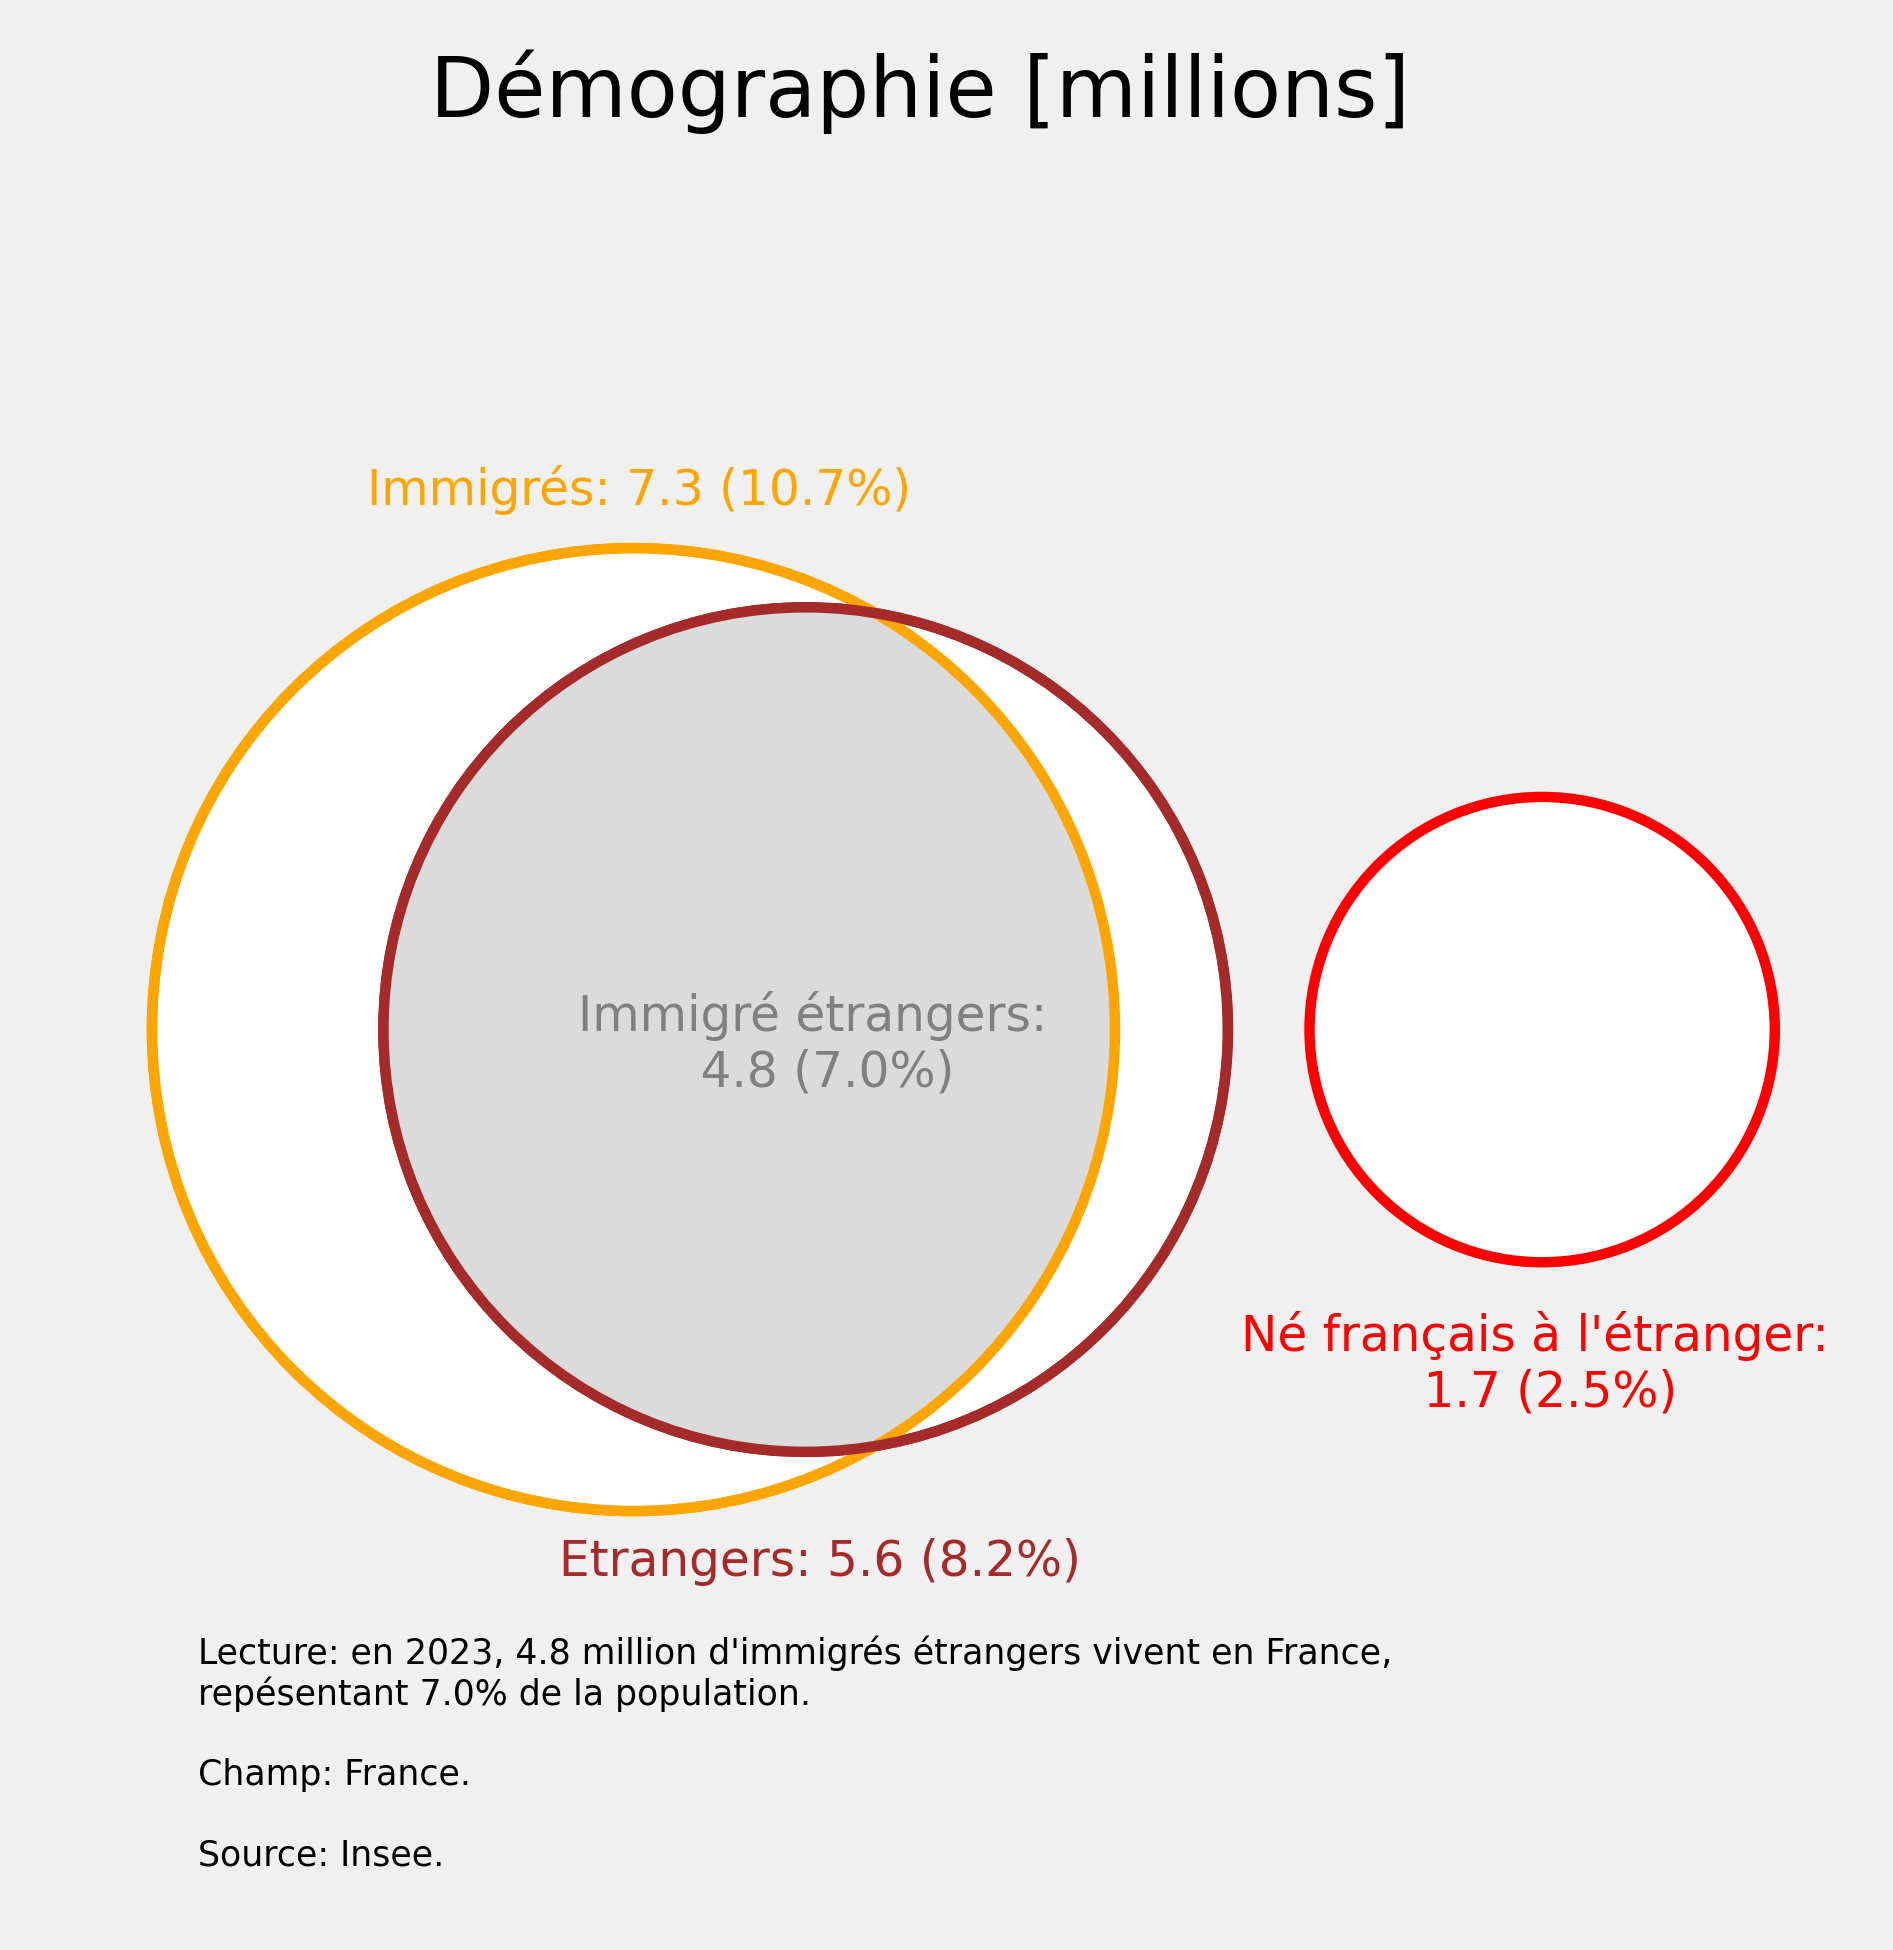

In [7]:
# read the graph
lecture_fr = f"en 2023, 4.8 million d'immigrés étrangers vivent en France,\nrepésentant 7.0% de la population"
lecture_en = f"in 2023, 4.8 million foreign immigrants live in France,\nrepresenting 7.0% of the population"

if language == 'fr':
    lecture = lecture_fr 
elif language == 'en':
    lecture = lecture_en

# Compute the ratio of areas
r = 2.2

ratio_i = immigrants / population
ratio_f = foreign / population
ratio_x = born_fr_abroad / population
ratio_i_f = immigrants_for / population
S_inter = inter_i_f / population * np.pi * r**2

# Compute radius of larger circle so area ratio matches
r_i = np.sqrt(ratio_i) * r
r_f = np.sqrt(ratio_f) * r
r_x = np.sqrt(ratio_x) * r

# Compute distance between circles for intersection area = inter_i_f
def inter_area(d, r1, r2):
    if d >= r1 + r2:
        return 0
    if d <= abs(r1 - r2):
        return np.pi * min(r1, r2)**2
    part1 = r1**2 * np.arccos((d**2 + r1**2 - r2**2) / (2 * d * r1))
    part2 = r2**2 * np.arccos((d**2 + r2**2 - r1**2) / (2 * d * r2))
    part3 = 0.5 * np.sqrt(
        (-d + r1 + r2) * (d + r1 - r2) *
        (d - r1 + r2) * (d + r1 + r2)
    )
    return part1 + part2 - part3

def objective(d):
    return abs(inter_area(d, r_i, r_f) - S_inter)

result = minimize_scalar(objective, bounds=(0, r_i + r_f), method='bounded')
d_optimal = result.x

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=500)  # One row, two columns
fig.patch.set_facecolor('#f0f0f0')  # overall background (optional)

# Common settings
circle_width = 1.5
leg_size = 7
note_size = 5

ax.set_aspect('equal')
ax.set_facecolor('white')
ax.axis('off')
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
offset = 0.3

# Create shapely circles
circle_i_shape = Point(-d_optimal/2 - offset, 0).buffer(r_i, resolution=500)
circle_f_shape = Point(+d_optimal/2 - offset, 0).buffer(r_f, resolution=500)
intersection = circle_i_shape.intersection(circle_f_shape)

# Draw circles on ax1
#ax.add_artist(plt.Circle((0, 0), r, fill=True, facecolor='white', edgecolor='black', linewidth=circle_width, zorder=1))

ax.add_artist(plt.Circle((-d_optimal/2  - offset, 0), r_i, fill=True, facecolor='white', edgecolor='orange', linewidth=circle_width, zorder=1))
ax.add_artist(plt.Circle((+d_optimal/2 - offset, 0), r_f, fill=True, facecolor='white', edgecolor='brown', linewidth=circle_width, zorder=1))
ax.add_artist(plt.Circle((+d_optimal/2 + r/2 - offset, 0), r_x, fill=True, edgecolor='red', facecolor='white', linewidth=circle_width, zorder=1))

if not intersection.is_empty:
    # Get coordinates of the intersecting region
    x, y = intersection.exterior.xy
    ax.fill(x, y, color='lightgray', alpha=0.8, zorder=2)
    
ax.add_artist(plt.Circle((-d_optimal/2  - offset, 0), r_i, fill=False, facecolor='white', edgecolor='orange', linewidth=circle_width, zorder=3))
ax.add_artist(plt.Circle((+d_optimal/2  - offset, 0), r_f, fill=False, facecolor='white', edgecolor='brown', linewidth=circle_width, zorder=3))


#ax.add_artist(plt.Circle((-d_optimal/2, 0), r_i, fill=False, edgecolor='orange', linewidth=circle_width, zorder=3))
#ax.add_artist(plt.Circle((+d_optimal/2, 0), r_f, fill=False, edgecolor='blue', linewidth=circle_width, zorder=3))
#ax.add_artist(plt.Circle((+d_optimal/2 + 0.55, 0), r_x, fill=False, edgecolor='red', linewidth=circle_width, zorder=3))
    
#ax.text(0, r + 0.05, f'Population: {population} ({population/population*100:.3g}%)',
#         ha='center', va='bottom', fontsize=leg_size)
ax.text(0  - offset*1.4, r_i + 0.05, label_immig+f': {immigrants:.2g} ({ratio_i*100:.3g}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'orange')
ax.text(0  - offset*0.5, -r_f - 0.2 , label_for+f': {foreign:.2g} ({ratio_f*100:.2g}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'brown')
ax.text(d_optimal/2 + r/2  - offset, -r_x - 0.23, label_born_fr_ab+f': \n {born_fr_abroad} ({ratio_x*100:.2g}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'red')
ax.text(0  - offset*0.5, - 0.1 , label_for_immig+f': \n {immigrants_for} ({ratio_i_f*100:.1f}%)',
         ha='center', va='bottom', fontsize=leg_size, color = 'gray')

ax.set_title(label_demo+f" [millions]")

ax.text(-r_i*1.5, -r_i - 0.3, label_lec+f': '+lecture+f".",
         ha='left', va='bottom', fontsize=note_size)
ax.text(-r_i*1.5, -r_i - 0.42, label_champ+f': '+champ+f".",
         ha='left', va='bottom', fontsize=note_size)
ax.text(-r_i*1.5, -r_i - 0.54, f'Source: '+source+".",
         ha='left', va='bottom', fontsize=note_size)

plt.tight_layout()
#plt.show()
#plt.savefig("plots/circles_overlap_zoom.png", dpi=500, bbox_inches='tight')
plt.savefig(f"plots/circles_overlap_zoom_"+language+f".png", dpi=500, bbox_inches='tight')